<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/Multicapa%20/%20Popularidad_cancion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio: Predicción de popularidad de una canción

Practica de redes neuronales / MULTICAPA

---
Liliana Patricia Hernandez Cruz

Mostraremos un ejemplo sencillo de un problema de regresión para la predicción de la popularidad de una canción, utilizando los módulos de tensorflow, numpy y pandas y para el conjunto de datos utilizaremos una base de datos obtenida de Spotify.

Conjunto de datos
La base de datos de Spotify, contiene información de miles de canciones disponibles en la plataforma Spotify.

Cada canción incluyen atributos cuantitativos como:

* Danceability (bailabilidad),

* Energy (nivel de energía),

* Loudness (volumen promedio en decibelios),

* Speechiness (porcentaje de contenido hablado),

* Acousticness (nivel de acústica),

* Instrumentalness (nivel instrumental de la canción),

* Valence (positividad emocional),

* Tempo (ritmo de una canción, se mide en beats por minuto) y

* Popularity (nivel de popularidad de la canción),

* Duration_ms (duración en milisegundos)

Además, incluye datos cuantitativos como el nombre del artista, el género musical y si explícita o no.

In [ ]:
import pandas as pd #Cargamos nuestra base de datos

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)


In [ ]:
df #Visualizamos la BD


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Preprocesamiento de datos

In [ ]:
# Seleccionar características (features)
#Tomo 12 variables para predecir la popularidad de una canción
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values

# Target numérico
y = df['popularity'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)
#Separo los datos de entrenamiento y prueba

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Normalizo los parámetros con la media y la desviación estándar

#Red neuronal multicapa

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
#Tengo 3 capas de las cuales 2 están ocultas y la de salida solo tiene una neurona

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

#Optimizo utilizando adam para que acelere el modelo y minimice los errores

Compilo el modelo

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)
#Compilo utilizando el optimizador adam y la función de pérdida error cuadrático medio (mse) para regresión.

Entrenar el modelo

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=50,
)
#Entreno mi modelo con el (.fit) y con 50 épocas

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 751.2190 - mae: 22.1207 - val_loss: 486.0275 - val_mae: 18.1876
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 482.8576 - mae: 18.1848 - val_loss: 476.3912 - val_mae: 18.0449
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 474.7395 - mae: 18.0275 - val_loss: 470.8725 - val_mae: 17.8866
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 468.1324 - mae: 17.8351 - val_loss: 464.9487 - val_mae: 17.6828
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 462.8283 - mae: 17.6492 - val_loss: 464.6338 - val_mae: 17.6744
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 463.0818 - mae: 17.6802 - val_loss: 462.1703 - val_mae: 17.6093
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 458.0520 - mae: 17.5324 - val_loss: 461.1995 - val_mae: 17.5822
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 458.6389 - mae: 17.5609 - val_loss: 459.0820 - val_mae: 

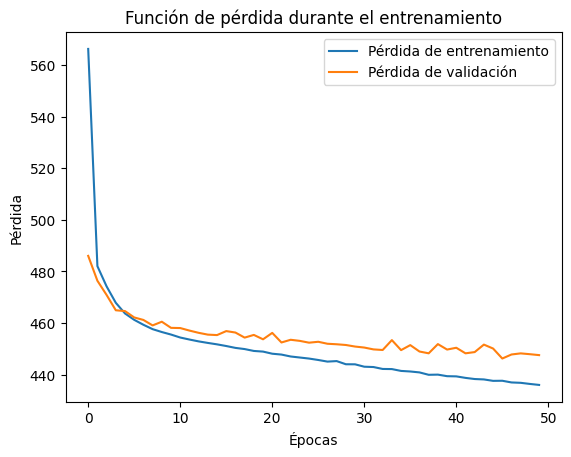

In [ ]:
import matplotlib.pyplot as plt #Gráfico la función de pérdida usando la librería matplotlib

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#La función debe tender a cero para decir que el modelo está aprendiendo


Evaluación

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")

#Evaluamos el rendimiento del modelo con (.evaluate)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 446.2887 - mae: 17.1748
MAE en el conjunto test: 17.084253311157227


Predicción

In [ ]:
import pandas as pd

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

#Hace predicciones y los compara con los valores reales

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  46.275604
1      11  12.445759
2       0  23.422426
3       0  30.923910
4      57  40.582535


In [ ]:
nombre_cancion = "Beso" #Busca una canción en específico en la BD, por ejemplo las que tienen la palabra "Beso" en el nombre

canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]

print(f"Canciones encontradas:")
canciones_df[['track_name', 'artists', 'album_name']].head()


Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


In [ ]:
# indice a selecionar
i = 0
cancion = canciones_df.iloc[i]
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 42.20


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

#r2_score mide qué tan bien las predicciones se ajustan a los valores reales
#mean_squared_error mide el promedio de los cuadrados de los errores

R²: 0.10513299703598022
MSE: 441.59979248046875
